1. Gerekli kütüphaneler

In [78]:
# Veri işleme
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, recall_score,
    precision_score, f1_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

2. Veri okuma

In [79]:
# Eğitim ve test verilerini yükle
train = pd.read_csv("datasets/processed_train_data.csv")
test = pd.read_csv("datasets/processed_test_data.csv")

# İlk birkaç satırı kontrol et
train.head()

,Age,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Diagnosis
0,-1.614149,-0.817197,-0.654783,-0.419746,-0.576230,-0.500403,0.480690,0.124991,0.657891,0.163777,1
1,1.251874,-0.817197,1.527223,-0.419746,-0.576230,-0.500403,0.218476,1.510279,1.323269,-0.791487,1
2,1.251874,-0.817197,1.527223,-0.419746,1.735418,-0.500403,0.354828,-1.571986,1.304786,0.516809,1
3,0.743386,-0.817197,-0.654783,-0.419746,-0.576230,-0.500403,-0.026257,-0.082802,1.531199,1.312862,0
4,-0.458494,-0.817197,-0.654783,2.382394,-0.576230,1.998391,0.973653,1.579544,0.542374,-1.608306,0


3. Özellik ve hedef değişkenleri ayrımı

In [80]:
# Eğitim verisinden özellikler ve hedef değişkeni ayır
X_train = train.drop("Diagnosis", axis=1)
y_train = train["Diagnosis"]

# Test verisinden özellikler ve hedef değişkeni ayır
X_test = test.drop("Diagnosis", axis=1)
y_test = test["Diagnosis"]

# Kontrol için boyutları yazdıralım
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (261162, 10)
y_train: (261162,)
X_test: (42539, 10)
y_test: (42539,)


4. Model eğitimi

In [81]:
# Lojistik Regresyon modelini oluştur
model = LogisticRegression(max_iter=1000, random_state=42)

# Modeli eğit
model.fit(X_train, y_train)

print("Model başarıyla eğitildi.")

Model başarıyla eğitildi.


5. Test verisi üzerinde tahmin

In [82]:
# Doğrudan X_test kullanılabilir çünkü zaten SelectKBest uygulanmış
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Tahminler tamamlandı.")

Tahminler tamamlandı.


6. Performans metriklerini hesaplama

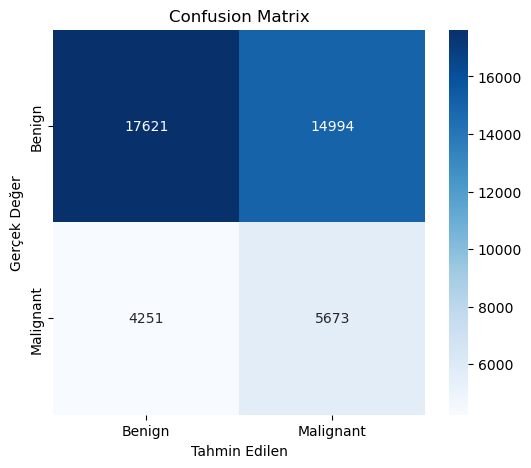

Accuracy       : 0.5476
Recall (Sensitivity): 0.5716
Specificity    : 0.5403
Precision      : 0.2745
F1 Score       : 0.3709


In [83]:
# Confusion matrix hesapla
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Metrikler
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = tn / (tn + fp)

# Confusion matrix görselleştir
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Confusion Matrix")
plt.show()

print(f"Accuracy       : {accuracy:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity    : {specificity:.4f}")
print(f"Precision      : {precision:.4f}")
print(f"F1 Score       : {f1:.4f}")

7. ROC eğrisi

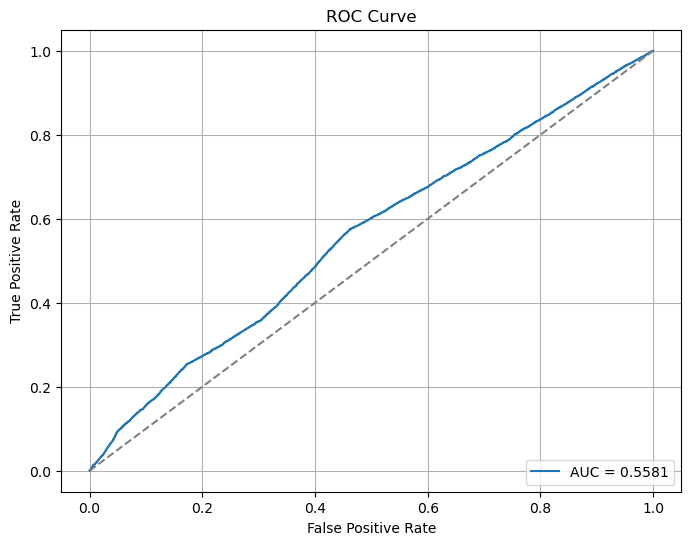

In [84]:
# ROC eğrisini çizmek için doğru veriyi al
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# ROC eğrisini çiz
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()